# Breast Cancer Wisconsin (Diagnostic)

Fonte: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Este conjunto de dados está licenciado sob uma licença Creative Commons Attribution 4.0 International (CC BY 4.0). Isto permite o compartilhamento e adaptação dos conjuntos de dados para qualquer finalidade, desde que seja dado o devido crédito.

> **Atributos**

*   Número de identificação
*   Diagnóstico (M = maligno, B = benigno)
*   raio (média das distâncias do centro aos pontos no perímetro)
*   textura (desvio padrão dos valores da escala de cinza)
*   perímetro
*   área
*   suavidade (variação local nos comprimentos dos raios)
*   compacidade (perímetro ^ 2 / área - 1,0)
*   concavidade (severidade das porções côncavas do contorno)
*   pontos côncavos (número de porções côncavas do contorno)
*   simetria
*   dimensão fractal ("aproximação da linha costeira" - 1)

**Descrição:** As características são calculadas a partir de uma imagem digitalizada de um aspirado com agulha fina (PAAF) de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.

**Objetivo:** Criar um modelo para classificar como "Maligno" ou "Benigno", a partir das caracteristicas descritas (variáveis independentes), casos de massa no seio mamário, utilizando como referencia a variável target (Diagnosis).

### Import da base de dados

In [5]:
pip install ucimlrepo

In [6]:
!pip install -U ydata-profiling

In [7]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Para treinar um modelo de machine learning precisamos de uma base historica.

Conhecer a base,
entender os dados,
identificar se existem padrões,
precisamos retirar ou adicionar algum input?

Importando a base de dados

In [8]:
breast_cancer_wisconsin_diagnostic = pd.read_csv(r"/content/data.csv")
breast_cancer_wisconsin_diagnostic.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
breast_cancer_wisconsin_diagnostic.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

  Separar base em dados de entrada e dados de saída

In [11]:
X = breast_cancer_wisconsin_diagnostic.drop(['diagnosis'], axis=1)
y = breast_cancer_wisconsin_diagnostic.diagnosis

### Análise de Nulos

Existe alguma linha nula no meio dos dados?
Se sim precisamos tratar (remover, aplicar tecnicas de oversampling e etc)

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Exclui campo irrelevante

In [13]:
X.drop(['Unnamed: 32'], axis=1,inplace=True)

In [14]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: diagnosis
Non-Null Count  Dtype 
--------------  ----- 
569 non-null    object
dtypes: object(1)
memory usage: 4.6+ KB


### Balanceamento das classes

Nessa etapa precisamos garantir que a nossa variavel target vai estar balanceada ( ou seja, mesma quantidade de itens classificados como maligno e benigno).
Para evitar enviezar a base, garantindo melhor treinamento

In [15]:
pip install -U imbalanced-learn

In [16]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

print("Contagem das classes antes do SMOTE:", Counter(y))

# Crie uma instância do SMOTE e aplique-o ao conjunto de dados
smote = SMOTE(sampling_strategy='auto', random_state=42)
X, y = smote.fit_resample(X, y)


print("Contagem das classes após o SMOTE:", Counter(y))



Contagem das classes antes do SMOTE: Counter({np.int64(0): 357, np.int64(1): 212})
Contagem das classes após o SMOTE: Counter({np.int64(1): 357, np.int64(0): 357})


Foi necessário balancear as classes, para que o modelo não ficasse enviezado. Para isso apliquei a técnica de amostragem de Oversampling Smote.

In [17]:
X_dim1 = X.filter(['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave_points_mean','symmetry_mean','fractal_dimension_mean'])
X_dim2 = X.filter(['radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave_points_se','symmetry_se','fractal_dimension_se'])
X_dim3 = X.filter(['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave_points_worst','symmetry_worst','fractal_dimension_worst'])

Analisar distribuição dos dados,
tem outliers?

In [18]:
X_dim1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,14.834860,19.768487,96.865548,723.292545,0.097145,0.110889,0.101796,0.182845,0.062467
std,3.628467,4.336748,25.046952,365.825465,0.013366,0.052279,0.080739,0.026037,0.006672
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.106000,0.049960
25%,12.112666,16.842500,77.892500,450.200000,0.087612,0.070795,0.035838,0.164708,0.057802
50%,14.216727,19.518759,92.613119,625.964583,0.097431,0.105004,0.086155,0.181629,0.061455
75%,17.485752,22.074990,114.475000,950.700000,0.105400,0.138766,0.148893,0.196762,0.065648
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.304000,0.097440


In [19]:
X_dim2.describe()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,symmetry_se,fractal_dimension_se
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.445531,1.209483,3.153394,46.552914,0.006937,0.026515,0.033529,0.020518,0.003789
std,0.286056,0.520507,2.098576,46.622649,0.002857,0.017007,0.028031,0.008253,0.002432
min,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.007882,0.000895
25%,0.250125,0.856275,1.778000,19.300000,0.005160,0.014060,0.017142,0.015240,0.002334
50%,0.358692,1.119856,2.562000,30.055000,0.006272,0.023037,0.028853,0.018725,0.003317
75%,0.564483,1.440801,3.889817,59.854753,0.007961,0.033687,0.043807,0.022978,0.004546
max,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.078950,0.029840


In [20]:
X_dim3.describe()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,17.256624,26.366570,114.134377,988.338228,0.133921,0.274071,0.303235,0.295682,0.084655
std,4.979940,6.121646,34.652327,588.441785,0.021840,0.155213,0.206442,0.061460,0.017206
min,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.156500,0.055040
25%,13.342500,21.985000,86.845000,546.875000,0.119425,0.162300,0.139125,0.255450,0.072790
50%,16.215000,26.070536,106.961401,805.261311,0.134300,0.244450,0.281750,0.287423,0.081490
75%,20.608234,30.377500,138.434191,1314.500000,0.148025,0.362350,0.421431,0.321750,0.092677
max,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.663800,0.207500


In [21]:
y_ = pd.DataFrame(y, columns=['diagnosis'])
df = pd.merge(X, y_, how='inner',left_index=True, right_index=True)

In [22]:
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,...,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,1
1,842517,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,...,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,1
2,84300903,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,...,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,1
3,84348301,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,...,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,1
4,84358402,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,...,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,886544,14.176003,17.831422,93.814926,624.140054,0.109765,0.151216,0.125806,0.063291,0.198258,...,23.285969,112.623354,876.824205,0.151098,0.350469,0.358662,0.151224,0.309456,0.082407,1
710,856720,15.640118,19.525144,103.076417,778.249738,0.109212,0.145941,0.136084,0.082802,0.203038,...,26.151081,123.610648,1104.895739,0.141056,0.304224,0.316666,0.141221,0.339597,0.091793,1
711,89927,22.599174,24.026193,149.073831,1615.206306,0.105543,0.129105,0.220404,0.132053,0.184116,...,30.663298,188.507611,2539.599730,0.145428,0.261728,0.459129,0.202828,0.258909,0.077067,1
712,25610,15.021883,19.512373,98.277079,709.296841,0.105160,0.109476,0.127603,0.070836,0.185913,...,26.835227,123.108685,1120.950665,0.151471,0.221098,0.354345,0.143760,0.284714,0.078791,1


### Encoding na variavel target

TODAS AS VARIAVEIS DEVEM SER DO TIPO NUMERICA, O COMPUTADOR NÃO ENTENDE STRING

0 = Benigno
1 = Maligno

In [23]:
df

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,...,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,1
1,842517,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,...,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,1
2,84300903,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,...,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,1
3,84348301,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,...,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,1
4,84358402,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,...,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,886544,14.176003,17.831422,93.814926,624.140054,0.109765,0.151216,0.125806,0.063291,0.198258,...,23.285969,112.623354,876.824205,0.151098,0.350469,0.358662,0.151224,0.309456,0.082407,1
710,856720,15.640118,19.525144,103.076417,778.249738,0.109212,0.145941,0.136084,0.082802,0.203038,...,26.151081,123.610648,1104.895739,0.141056,0.304224,0.316666,0.141221,0.339597,0.091793,1
711,89927,22.599174,24.026193,149.073831,1615.206306,0.105543,0.129105,0.220404,0.132053,0.184116,...,30.663298,188.507611,2539.599730,0.145428,0.261728,0.459129,0.202828,0.258909,0.077067,1
712,25610,15.021883,19.512373,98.277079,709.296841,0.105160,0.109476,0.127603,0.070836,0.185913,...,26.835227,123.108685,1120.950665,0.151471,0.221098,0.354345,0.143760,0.284714,0.078791,1


### Relação entre variáveis - 2  variáveis

Grafico de pontos com a relação entre área x raio.

A área é diretamente proporcional ao raio, na classificação de um tumor existe uma sobreposição entre a classificação que provavelmente é explicado por outras variaveis. Por esse motivo, a analise apenas com duas das variáveis não nos ajuda a entender a separação dos dados, necessário analisar com todas as dimensões.

<Axes: xlabel='area_mean', ylabel='radius_mean'>

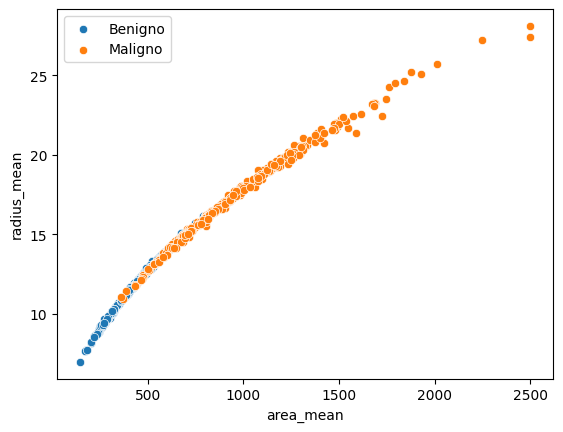

In [24]:
sns.scatterplot(data=df[df.diagnosis == 0], x='area_mean', y='radius_mean', label='Benigno')
sns.scatterplot(data=df[df.diagnosis == 1], x='area_mean', y='radius_mean', label='Maligno')

Para visualizar um contexto geral, abaixo uma analise de PCA para tentar entender o comportamento dos atributos, dado uma classificação. Vamos simplificar para 2 dimensões.

### Redução de dimensionalidade : PCA e MATRIZ DE COVARIÂNCIA

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

## Rescalagem dos dados para transformar eles entre 0 e 1
scaler = MinMaxScaler()
df_filter = df.drop(['diagnosis'], axis=1)
scl_base = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

scl_base.sample(3)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
184,0.000949,0.392778,0.429489,0.380969,0.240551,0.342512,0.263235,0.125937,0.162177,0.336869,...,0.426706,0.315703,0.193644,0.389157,0.293594,0.289936,0.421306,0.317366,0.279942,1.0
302,0.097941,0.620427,0.478526,0.628222,0.468081,0.499865,0.504325,0.534911,0.636183,0.600505,...,0.464019,0.539818,0.371313,0.419534,0.302520,0.393930,0.660825,0.340824,0.260068,1.0
480,0.000991,0.245113,0.281366,0.238408,0.132259,0.345220,0.180970,0.068322,0.075895,0.204040,...,0.422441,0.191344,0.089019,0.327742,0.194633,0.129393,0.195533,0.165780,0.145940,0.0


In [26]:
## Cálculo de matriz de covariância
cov_matriz = np.cov(scl_base, rowvar=False)
cov_matriz.shape
campos = df.columns
campos

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis'],
      dtype='object')

Correlação

<Axes: >

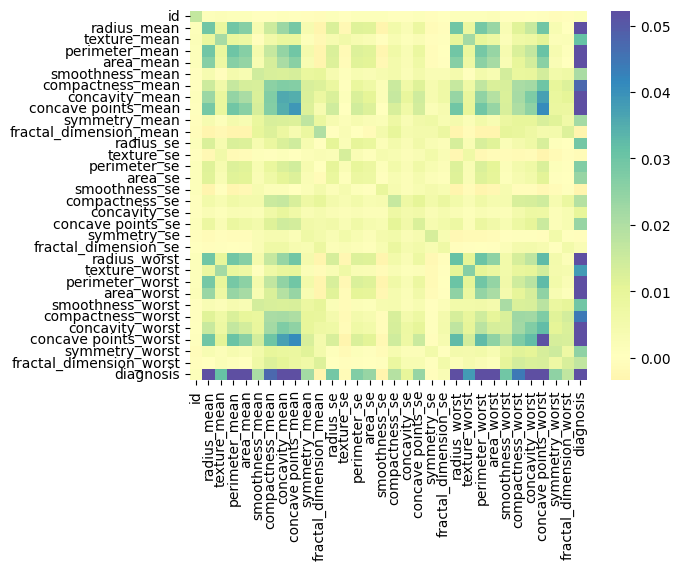

In [27]:
sns.heatmap(cov_matriz, cmap='Spectral', center=0, robust=True, xticklabels=campos, yticklabels=campos)


PCA

In [28]:
## Calculo de eigen-values e eigen-vector
eigen_values, eigen_vectors = np.linalg.eigh(cov_matriz)
eigen_values.shape, eigen_vectors.shape

((32,), (32, 32))

In [29]:
## Ordenação de componentes
sorted_index = np.argsort(eigen_values)[::-1] ##criação de indez com eigen-values em ordem decrescente
sorted_eigenvalue = eigen_values[sorted_index] ##ordenação dos eigen-values
sorted_eigenvectors = eigen_vectors[:, sorted_index]

In [30]:
## Selecionando 'n' componentes
n = 2 ## númerode componentes desejado
eigenvector_subset = sorted_eigenvectors[:,0:n]
eigenvector_subset.shape

(32, 2)

In [31]:
## Transformação dos dados
reduced = pd.DataFrame(np.dot(eigenvector_subset.T, scl_base.T).T)
reduced.shape

(714, 2)

In [32]:
y.shape

(714,)

In [33]:
df_ = pd.merge(reduced, df['diagnosis'], how='inner',left_index=True, right_index=True)
df_

,0,1,diagnosis
0,2.586319,1.140765,1
1,1.936781,-0.034037,1
2,2.291890,0.506377,1
3,2.239720,2.058106,1
4,2.043205,0.262623,1
...,...,...,...
709,1.721077,0.593496,1
710,1.809226,0.505334,1
711,2.424504,0.112533,1
712,1.718929,0.316412,1


In [34]:
df_target = df['diagnosis']

### Análise

Abaixo visualização das 30 dimensões resumidas em 2, onde consta uma separação visualmente intuitiva. Abaixo podemos observar alguns casos de outliers que se destacam.

<Axes: xlabel='0', ylabel='1'>

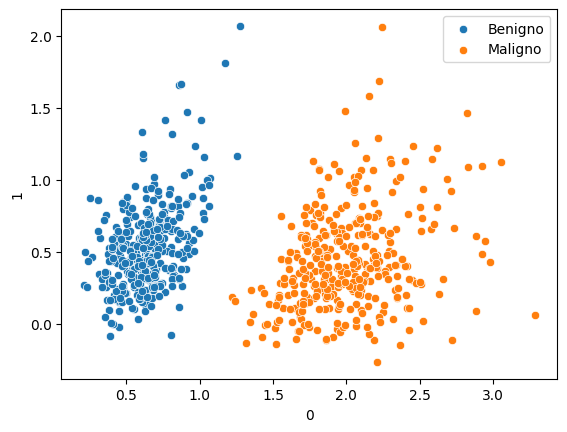

In [35]:
## Visualização
sns.scatterplot(data=df_[df_.diagnosis == 0], x=0, y=1, label='Benigno')
sns.scatterplot(data=df_[df_.diagnosis == 1], x=0, y=1, label='Maligno')

### Rescalagem

Rescalagem dos dados para transformar eles entre 0 e 1

In [36]:
df_ = pd.merge(scl_base, df_target, how='inner',left_index=True, right_index=True)
df_

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_x,diagnosis_y
0,0.000915,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,1.0,1
1,0.000915,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,1.0,1
2,0.092495,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,1.0,1
3,0.092547,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,1.0,1
4,0.092559,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.000963,0.340527,0.274651,0.345691,0.203877,0.515800,0.404379,0.294767,0.314566,0.465952,...,0.309843,0.169982,0.527824,0.313549,0.286472,0.519671,0.301509,0.179505,1.0,1
710,0.000931,0.409821,0.331929,0.409691,0.269247,0.510806,0.388200,0.318847,0.411541,0.490089,...,0.364563,0.226036,0.461508,0.268683,0.252928,0.485297,0.360925,0.241065,1.0,1
711,0.000089,0.739182,0.484146,0.727550,0.624266,0.477683,0.336559,0.516410,0.656326,0.394526,...,0.687771,0.578647,0.490377,0.227453,0.366717,0.697003,0.201871,0.144478,1.0,1
712,0.000019,0.380561,0.331497,0.376526,0.239999,0.474224,0.276351,0.298977,0.352070,0.403602,...,0.362063,0.229982,0.530282,0.188034,0.283023,0.494020,0.252739,0.155788,1.0,1


### Aplicação do Algoritmo

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

### Separação base de treino e teste

Precisamos treinar o modelo e depois testa-lo para garantir que ele aprendeu com o algoritmo

In [52]:
X = df_.iloc[:,1:(df_.shape[1] - 2)]

class_names = le.classes_
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]

(571, 143, 571, 143)

In [53]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.340527,0.274651,0.345691,0.203877,0.515800,0.404379,0.294767,0.314566,0.465952,0.291663,...,0.316600,0.300266,0.309843,0.169982,0.527824,0.313549,0.286472,0.519671,0.301509,0.179505
710,0.409821,0.331929,0.409691,0.269247,0.510806,0.388200,0.318847,0.411541,0.490089,0.328664,...,0.390906,0.376628,0.364563,0.226036,0.461508,0.268683,0.252928,0.485297,0.360925,0.241065
711,0.739182,0.484146,0.727550,0.624266,0.477683,0.336559,0.516410,0.656326,0.394526,0.125725,...,0.728368,0.496890,0.687771,0.578647,0.490377,0.227453,0.366717,0.697003,0.201871,0.144478
712,0.380561,0.331497,0.376526,0.239999,0.474224,0.276351,0.298977,0.352070,0.403602,0.162810,...,0.393232,0.394862,0.362063,0.229982,0.530282,0.188034,0.283023,0.494020,0.252739,0.155788


In [54]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
264,0.483175,0.417991,0.468592,0.332895,0.402907,0.216459,0.212301,0.324404,0.407576,0.122999,...,0.485592,0.461354,0.448678,0.307413,0.558872,0.222575,0.310623,0.681787,0.325448,0.135511
56,0.578778,0.299628,0.564647,0.427784,0.475490,0.329182,0.309981,0.447018,0.432828,0.203243,...,0.647812,0.429638,0.596095,0.481665,0.602457,0.314162,0.309824,0.718557,0.388725,0.182999
204,0.259785,0.300643,0.257757,0.143542,0.424483,0.265076,0.187559,0.189911,0.436869,0.290017,...,0.250445,0.336354,0.227302,0.121092,0.471703,0.204238,0.213339,0.348797,0.285630,0.212908
571,0.445086,0.470549,0.449651,0.300087,0.460824,0.397619,0.379504,0.418319,0.399454,0.267116,...,0.451120,0.575471,0.477156,0.277166,0.548080,0.439303,0.430335,0.635368,0.376349,0.233969
527,0.253632,0.086574,0.242900,0.137858,0.337637,0.134010,0.069306,0.131561,0.317677,0.171019,...,0.202063,0.193230,0.183326,0.093320,0.383213,0.174744,0.143051,0.367698,0.304554,0.136954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.090255,0.166723,0.103656,0.042630,0.408053,0.410159,0.201640,0.142744,0.425253,0.839090,...,0.064141,0.097281,0.060511,0.024381,0.327082,0.209865,0.114537,0.164467,0.135817,0.349993
106,0.220503,0.291512,0.216847,0.114104,0.555836,0.252500,0.165651,0.173211,0.374242,0.320977,...,0.185343,0.459488,0.174810,0.082703,0.644720,0.231598,0.229473,0.418557,0.244628,0.235668
270,0.345923,0.240446,0.321401,0.207466,0.105263,0.022606,0.016987,0.031064,0.226263,0.080034,...,0.248310,0.230011,0.219284,0.122739,0.095754,0.022383,0.030879,0.114536,0.176030,0.040404
435,0.331251,0.335137,0.327068,0.193425,0.481809,0.288080,0.263824,0.321223,0.307576,0.326032,...,0.324084,0.500533,0.316201,0.168133,0.595192,0.319692,0.325000,0.627835,0.318155,0.330972


In [55]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
120,0.209617,0.037538,0.204202,0.110201,0.371039,0.145605,0.082287,0.130368,0.306566,0.235257,...,0.173959,0.105277,0.165994,0.079950,0.552268,0.205402,0.167891,0.307835,0.286024,0.198019
329,0.439159,0.411566,0.440260,0.289841,0.576600,0.334090,0.421509,0.396670,0.408586,0.323505,...,0.348630,0.351546,0.315205,0.194160,0.471703,0.178818,0.267093,0.359794,0.230830,0.160632
39,0.307587,0.375719,0.308272,0.176331,0.442087,0.325502,0.249063,0.270328,0.333333,0.299705,...,0.270366,0.373134,0.283331,0.136453,0.593211,0.383435,0.401757,0.775945,0.244826,0.341467
294,0.271617,0.137639,0.262525,0.147869,0.397581,0.197994,0.030178,0.095626,0.291919,0.232519,...,0.198150,0.145522,0.189900,0.090567,0.387176,0.116337,0.041797,0.217973,0.158486,0.093008
654,0.571114,0.396827,0.562590,0.415255,0.389154,0.396287,0.310813,0.381468,0.506111,0.250835,...,0.595681,0.583834,0.560093,0.417645,0.530244,0.436085,0.380172,0.742550,0.482316,0.290668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0.675991,0.202214,0.668235,0.522116,0.430212,0.395610,0.448807,0.613438,0.451789,0.240068,...,0.522432,0.276200,0.502802,0.330076,0.330388,0.243313,0.321182,0.665371,0.224518,0.197342
132,0.434427,0.400068,0.431276,0.282630,0.434865,0.334397,0.244377,0.278976,0.555556,0.188500,...,0.410530,0.523987,0.394890,0.243266,0.451232,0.269921,0.238978,0.450859,0.377489,0.138725
291,0.377633,0.317552,0.367908,0.230668,0.336643,0.241856,0.139175,0.239513,0.413636,0.180286,...,0.295980,0.377665,0.292295,0.153510,0.397081,0.267495,0.144089,0.511684,0.275379,0.194674
41,0.187846,0.393642,0.194251,0.096543,0.632572,0.314153,0.244611,0.281759,0.421717,0.394693,...,0.174671,0.621535,0.183326,0.080810,0.790662,0.235284,0.321326,0.489347,0.275774,0.269054


### Algorimo de árvore de decisão simples

In [56]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classificador Árvore de Decisão:\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(clf.score(X_train, y_train)))
print("--------------------------------------")

print("--------------------------------------")
print("Acurácia da base de teste: {:.4f}".format(clf.score(X_test, y_test)))
print("--------------------------------------")


Classificador Árvore de Decisão:

--------------------------------------
Acurácia da base de treinamento: 1.00
--------------------------------------
--------------------------------------
Acurácia da base de teste: 0.9091
--------------------------------------


Constatei um overfitting alto, no próximo passo vou tentar testar com um algoritmo Random forest com 15 estimadores

In [57]:
# Random forest com 15 arvores BAGGING, critério adotado log_loss, com 30 de mínimo de amostras necessárias para dividir um nó interno

clr = RandomForestClassifier(n_estimators=15, criterion='log_loss', min_samples_split=30, random_state=42)

clr = clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)


print("Classificador Random Forest:\n RandomForestClassifier(n_estimators=10)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(clr.score(X_train, y_train)))
print("--------------------------------------")

print("--------------------------------------")
print("Acurácia da base de teste: {:.4f}".format(clr.score(X_test, y_test)))
print("--------------------------------------")

print(classification_report(y_test, y_pred))


Classificador Random Forest:
 RandomForestClassifier(n_estimators=10)

--------------------------------------
Acurácia da base de treinamento: 0.98
--------------------------------------
--------------------------------------
Acurácia da base de teste: 0.9441
--------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        69
           1       0.95      0.95      0.95        74

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



Após o treinamento constatei que ele estava sofrendo de overfitting, uma vez que o modelo de teste ficou com uma diferença grande do modelo de treino.

Por isso recorri a utilizar o ExtraTreesClassifier e assim ajustar alguns hiperparametros

In [58]:
cle = ExtraTreesClassifier(n_estimators=15,criterion='log_loss', min_samples_split=30, random_state=42)
cle = cle.fit(X_train, y_train)
y_pred = cle.predict(X_test)

print("Classificador Extreme Tree:\n ExtraTreesClassifier(n_estimators=10)\n")
print("--------------------------------------")
print("Acurácia da base de treinamento: {:.2f}".format(cle.score(X_train, y_train)))
print("--------------------------------------")

print("--------------------------------------")
print("Acurácia da base de teste: {:.4f}".format(cle.score(X_test, y_test)))
print("--------------------------------------")


Classificador Extreme Tree:
 ExtraTreesClassifier(n_estimators=10)

--------------------------------------
Acurácia da base de treinamento: 0.97
--------------------------------------
--------------------------------------
Acurácia da base de teste: 0.9790
--------------------------------------


Após a escolha de outro algoritmo, ajuste de hiperparametros, cheguei a uma acuracia, aceitável. O modelo não sofre mais de overfitting, está bem ajustado.


In [62]:
df_y_pred = pd.DataFrame(y_pred, columns=['Predict'])
df_y_test = pd.DataFrame(y_test, columns=['Test'])
d_analise = pd.merge(X_test, df_y_pred, how='inner',left_index=True, right_index=True)
d_analise = pd.merge(d_analise, df_y_test, how='inner',left_index=True, right_index=True)
d_analise.to_excel(r'testes.xlsx')
d_analise.head(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Predict,Test
120,0.209617,0.037538,0.204202,0.110201,0.371039,0.145605,0.082287,0.130368,0.306566,0.235257,...,0.165994,0.079950,0.552268,0.205402,0.167891,0.307835,0.286024,0.198019,1,1
39,0.307587,0.375719,0.308272,0.176331,0.442087,0.325502,0.249063,0.270328,0.333333,0.299705,...,0.283331,0.136453,0.593211,0.383435,0.401757,0.775945,0.244826,0.341467,1,1
65,0.369114,0.481231,0.370465,0.222609,0.582920,0.394209,0.296860,0.448757,0.451010,0.349200,...,0.319687,0.181847,0.618305,0.304945,0.241534,0.554639,0.346146,0.223468,0,0
78,0.624686,0.482246,0.690415,0.467232,0.685836,1.000000,0.879569,0.797217,0.932323,0.662595,...,0.597091,0.353372,0.612362,0.571557,0.613498,0.861856,0.763848,0.292536,1,1
97,0.132803,0.345959,0.126598,0.064051,0.449309,0.103153,0.016000,0.039448,0.146465,0.398905,...,0.091638,0.044460,0.399062,0.065431,0.016366,0.081821,0.072738,0.228519,1,1
